<a href="https://colab.research.google.com/github/glennamaria/Projects/blob/main/Fraudparttwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Project.csv"
df= pd.read_csv(path)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


In [5]:

# Convert categorical variable 'type' to numerical using Label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Drop unnecessary columns
df = df.drop(columns=['nameOrig', 'nameDest'])  # Removing string-based IDs

# Fill missing values if any
df.fillna(0, inplace=True)

# Define Features and Target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Normalize Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9995899196528623


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9997234341844885


In [9]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:12:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9997615811935245


In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naïve Bayes Accuracy: 0.9748277424123215


In [11]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9991464606728179


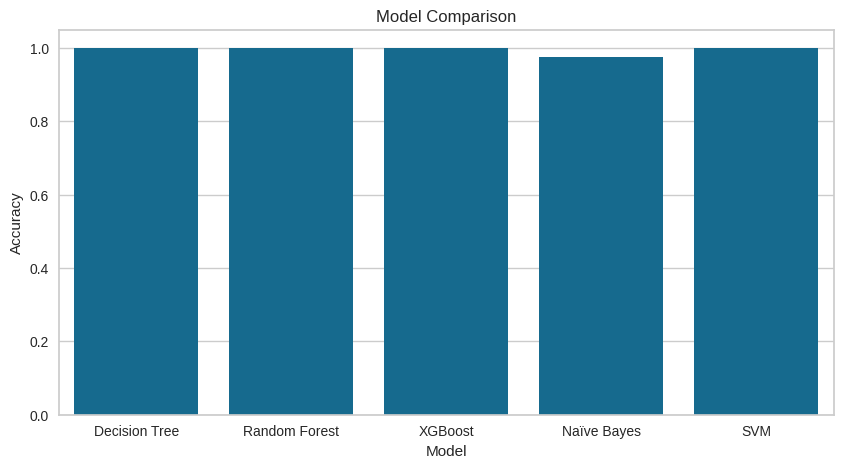

In [12]:
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Naïve Bayes', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_dt),
              accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_xgb),
              accuracy_score(y_test, y_pred_nb),
              accuracy_score(y_test, y_pred_svm)]

plt.figure(figsize=(10,5))
sns.barplot(x=models, y=accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    209487
           1       0.98      0.79      0.88       228

    accuracy                           1.00    209715
   macro avg       0.99      0.90      0.94    209715
weighted avg       1.00      1.00      1.00    209715



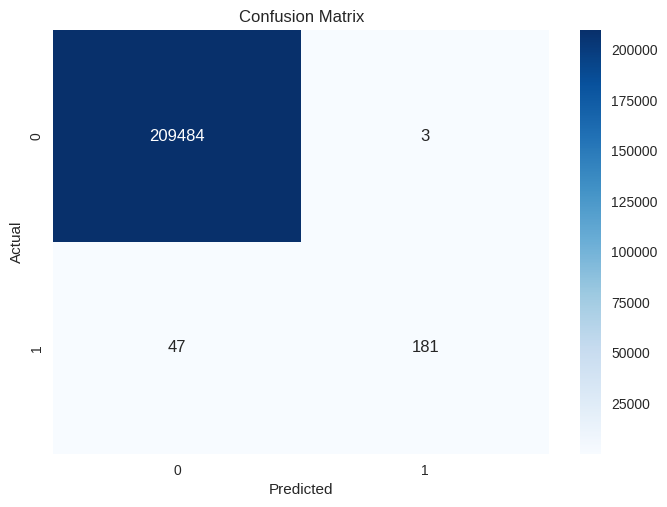

In [13]:
best_model = xgb  # Assuming XGBoost performed best
y_pred_best = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_best))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


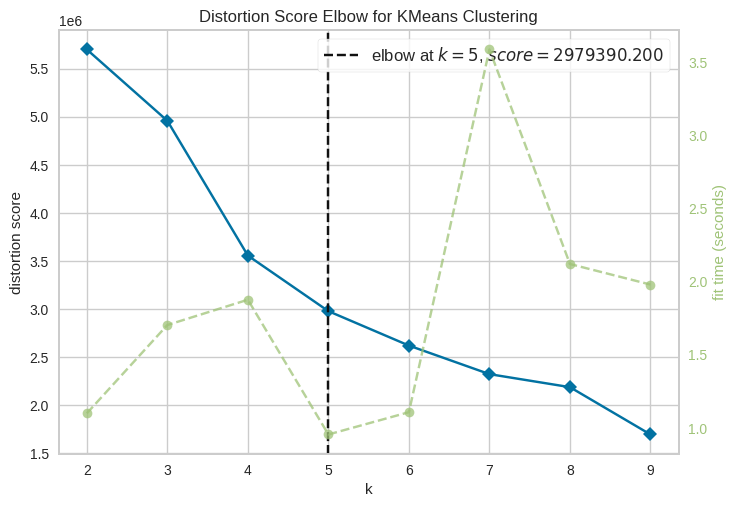

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(X_scaled)
visualizer.show()



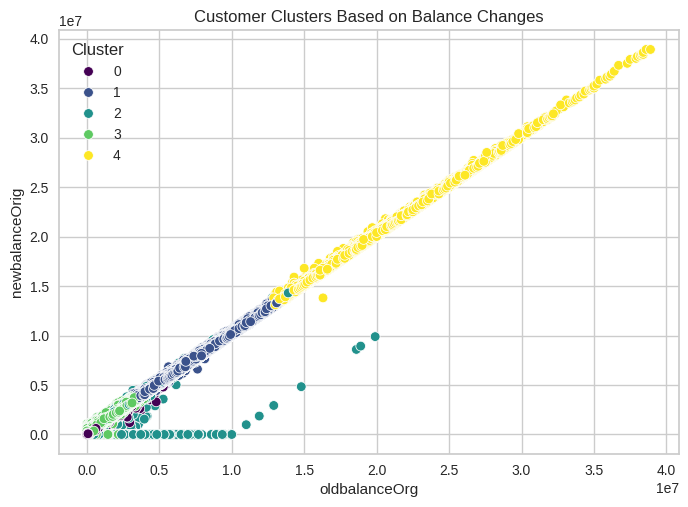

In [16]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing Clusters
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['Cluster'], palette='viridis')
plt.title("Customer Clusters Based on Balance Changes")
plt.show()


In [18]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
    'subsample': [0.6, 0.8, 1.0],  # Data fraction per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Feature fraction per tree
    'gamma': [0, 0.1, 0.2]  # Minimum loss reduction for partitioning
}

# Initialize GridSearch
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Train Best Model
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))


Fitting 5 folds for each of 729 candidates, totalling 3645 fits


KeyboardInterrupt: 

In [ ]:
sample_data = np.array([[1, 4, 50000, 20000, 30000, 100000, 120000, 0, 0]])  # Example transaction
sample_data_scaled = scaler.transform(sample_data)

prediction = best_model.predict(sample_data_scaled)
print("Fraud Prediction:", "Fraud" if prediction[0] == 1 else "Not Fraud")